<a href="https://colab.research.google.com/github/NVREND/Hactiv8-MSIB6/blob/main/Assignment3_Sesi26_EndrithaPramudya.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 3

Nama : Endritha Pramudya

Mentor Name : Nikki Satmaka

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Pada assignment ini, kita akan meneliti data prediksi stroke dengan menggunakan algoritma Decision Tree dan Random Forest untuk melakukan prediksi penyakit stroke. Lalu melakukan Hyperparameter Tuning Pada model tersebut dan tentukan model mana yang terbaik berdasarkan matrik evaluasi yang digunakan.

Attribute Information
1. id: unique identifier
2. gender: "Male", "Female" or "Other"
3. age: age of the patient
4. hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension
5. heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease
6. ever_married: "No" or "Yes"
7. work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"
8. Residence_type: "Rural" or "Urban"
9. avg_glucose_level: average glucose level in blood
10. bmi: body mass index
11. smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"*
12. stroke: 1 if the patient had a stroke or 0 if not
*Note: "Unknown" in smoking_status means that the information is unavailable for this patient

# Import Libraries

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


#preprocessing
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

#model ML
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV


#evaluasi
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import accuracy_score, classification_report

# Data Loading

In [ ]:
!mkdir ~/.kaggle

In [ ]:
!cp '/content/kaggle.json' ~/.kaggle
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets list

cp: cannot stat '/content/kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory
Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python3.10/dist-packages/kaggle/__init__.py", line 7, in <module>
    api.authenticate()
  File "/usr/local/lib/python3.10/dist-packages/kaggle/api/kaggle_api_extended.py", line 398, in authenticate
    raise IOError('Could not find {}. Make sure it\'s located in'
OSError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method.


In [ ]:
!kaggle datasets download -d fedesoriano/stroke-prediction-dataset

Dataset URL: https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset
License(s): copyright-authors
  0% 0.00/67.4k [00:00<?, ?B/s]
100% 67.4k/67.4k [00:00<00:00, 46.9MB/s]


In [ ]:
!unzip /content/stroke-prediction-dataset.zip

Archive:  /content/stroke-prediction-dataset.zip
  inflating: healthcare-dataset-stroke-data.csv  


In [ ]:
df= pd.read_csv('healthcare-dataset-stroke-data.csv')
df.shape

(5110, 12)

# Assessing Data


#### Memeriksa data tiap kolom


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


#### Memeriksa missing value

In [ ]:
df.isna().sum()


id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

Dapat diketahui bahwa kolom BMI memiliki 201 baris nilai kosong

#### Memeriksa duplikasi data

In [ ]:
print("Jumlah duplikasi: ",df.duplicated().sum())


Jumlah duplikasi:  0


Tidak ada duplikasi data

#### Melihat rangkuman Parameter Statistika




In [ ]:
print("Summary statistics:")
display(df.describe(include='number'))

Summary statistics:


,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


Berdasarkan rangkuman parameter statistik di atas, diperoleh informasi sebanyak 5110orang yang berumur di kisaran antara kurang dari 1 tahun hingga 82 tahun dengan rata-rata umur sebesar 43.27 tahun dengan standar deviasinya sebesar 22.612 tahun

# Cleaning Data

membersihkan dataframe dari nilai yang kosong

In [ ]:
df.dropna(inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4909 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 4909 non-null   int64  
 1   gender             4909 non-null   object 
 2   age                4909 non-null   float64
 3   hypertension       4909 non-null   int64  
 4   heart_disease      4909 non-null   int64  
 5   ever_married       4909 non-null   object 
 6   work_type          4909 non-null   object 
 7   Residence_type     4909 non-null   object 
 8   avg_glucose_level  4909 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     4909 non-null   object 
 11  stroke             4909 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 498.6+ KB


In [ ]:
df.isna().sum()


id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [ ]:
df.drop('id', axis=1, inplace=True)
df.shape

(4909, 11)

# EDA (Exploratory Data Analysis) & Visualization


In [ ]:
df.describe(include="all")

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,4909,4909.000000,4909.000000,4909.000000,4909,4909,4909,4909.000000,4909.000000,4909,4909.000000
unique,3,NaN,NaN,NaN,2,5,2,NaN,NaN,4,NaN
top,Female,NaN,NaN,NaN,Yes,Private,Urban,NaN,NaN,never smoked,NaN
freq,2897,NaN,NaN,NaN,3204,2811,2490,NaN,NaN,1852,NaN
mean,NaN,42.865374,0.091872,0.049501,NaN,NaN,NaN,105.305150,28.893237,NaN,0.042575
std,NaN,22.555115,0.288875,0.216934,NaN,NaN,NaN,44.424341,7.854067,NaN,0.201917
min,NaN,0.080000,0.000000,0.000000,NaN,NaN,NaN,55.120000,10.300000,NaN,0.000000
25%,NaN,25.000000,0.000000,0.000000,NaN,NaN,NaN,77.070000,23.500000,NaN,0.000000
50%,NaN,44.000000,0.000000,0.000000,NaN,NaN,NaN,91.680000,28.100000,NaN,0.000000
75%,NaN,60.000000,0.000000,0.000000,NaN,NaN,NaN,113.570000,33.100000,NaN,0.000000


In [ ]:
df.dtypes

gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

#### Stroke Patients

In [ ]:
stroke_counttotal = df[['stroke']].value_counts().sum()
print('Total pasien yang terkena stroke', stroke_counttotal)

Total pasien yang terkena stroke 4909


Menghitung persentasi penderita stroke

In [ ]:
stroke_count = df['stroke'].value_counts().reset_index(name='count')
stroke_count.columns = ['stroke', 'count']
stroke_count['percentage'] = (stroke_count['count'] / stroke_count['count'].sum()) * 100
stroke_count

,stroke,count,percentage
0,0,4700,95.742514
1,1,209,4.257486


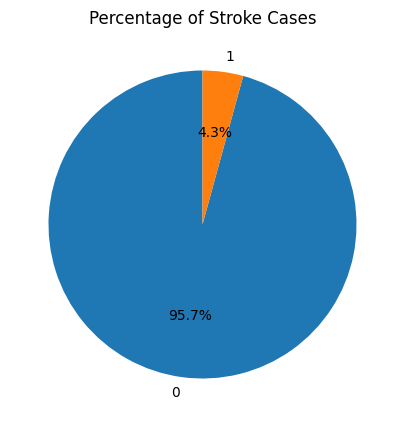

In [ ]:
plt.figure(figsize=(5, 5))
plt.pie(stroke_count['percentage'], labels=stroke_count['stroke'], autopct='%1.1f%%', startangle=90)
plt.title('Percentage of Stroke Cases')
plt.show()

Dari 4909 pasien pada dataset, 4.3% merupakan penderita stroke dan 95.7% bukan penderita stroke

#### Categorical Features

**Gender**

In [ ]:
condition = (1)
stroke_patients = df[(df['stroke'] == 1)]

In [ ]:
stroke_patients['gender'].value_counts()

gender
Female    120
Male       89
Name: count, dtype: int64

<Axes: xlabel='gender'>

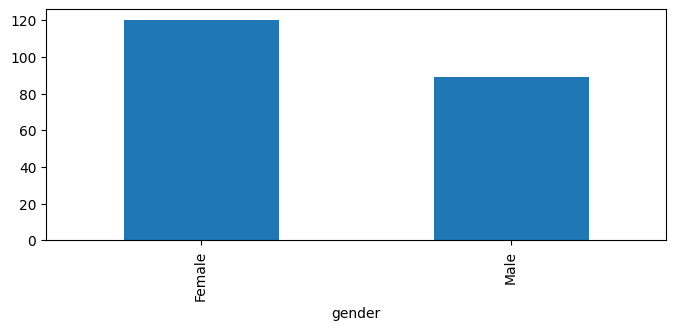

In [ ]:
plt.figure(figsize=(8,3))
stroke_patients["gender"].value_counts().plot(kind = "bar")

Dapat disimpulkan bahwa penderita penyakit stroke paling banyak merupakan wanita


**Smoke Status**

In [ ]:
stroke_patients["smoking_status"].value_counts()

smoking_status
never smoked       84
formerly smoked    57
smokes             39
Unknown            29
Name: count, dtype: int64

(array([0, 1, 2, 3]),
 [Text(0, 0, 'never smoked'),
  Text(1, 0, 'formerly smoked'),
  Text(2, 0, 'smokes'),
  Text(3, 0, 'Unknown')])

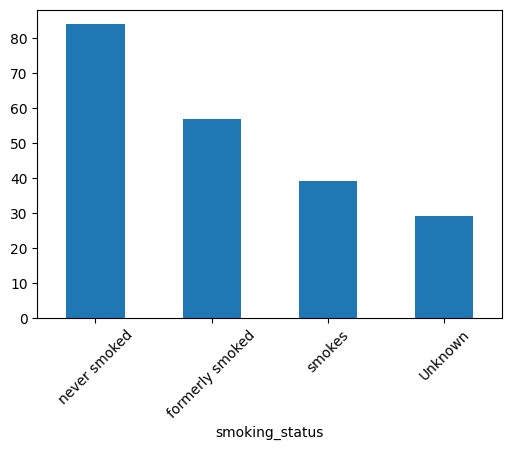

In [ ]:
plt.figure(figsize=(6,4))
stroke_patients["smoking_status"].value_counts().plot(kind = "bar")
plt.xticks(rotation=45)

Dari pasien tersebut 57 orang diantaranya sebelumnya pernah merokok, 84 orang tidak merokok dan 39 merupakan perokok.

**Work Status**

In [ ]:
stroke_patients["work_type"].value_counts()

work_type
Private          127
Self-employed     53
Govt_job          28
children           1
Name: count, dtype: int64

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Private'),
  Text(1, 0, 'Self-employed'),
  Text(2, 0, 'Govt_job'),
  Text(3, 0, 'children')])

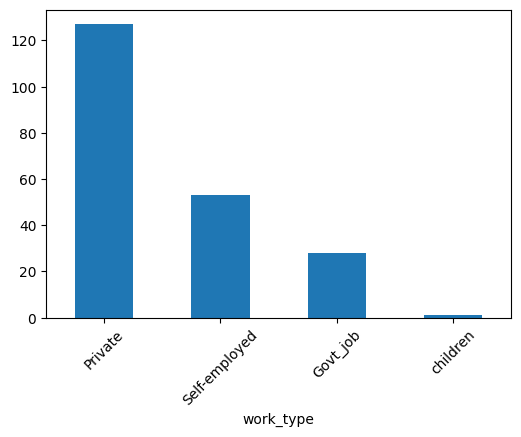

In [ ]:
plt.figure(figsize=(6,4))
stroke_patients["work_type"].value_counts().plot(kind = "bar")
plt.xticks(rotation=45)

Dapat diketahui bahwa individu yang bekerja di sektor swasta/private lebih berpeluang terkena stroke yaitu lebih dari 120 orang.

In [ ]:
stroke_patients["Residence_type"].value_counts()

Residence_type
Urban    109
Rural    100
Name: count, dtype: int64

<Axes: xlabel='Residence_type'>

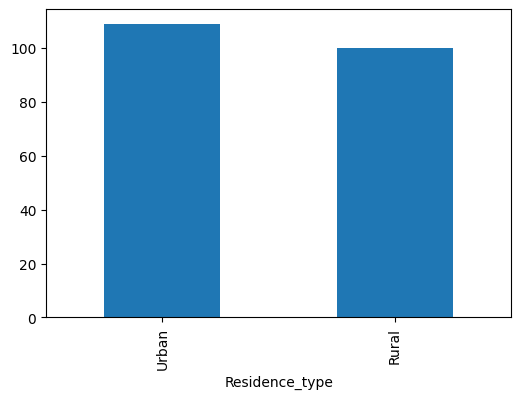

In [ ]:
plt.figure(figsize=(6,4))
stroke_patients["Residence_type"].value_counts().plot(kind = "bar")

Terlihat setara antara penduduk perkotaan dan pedesaan

In [ ]:
stroke_patients["ever_married"].value_counts()

ever_married
Yes    186
No      23
Name: count, dtype: int64

<Axes: xlabel='ever_married'>

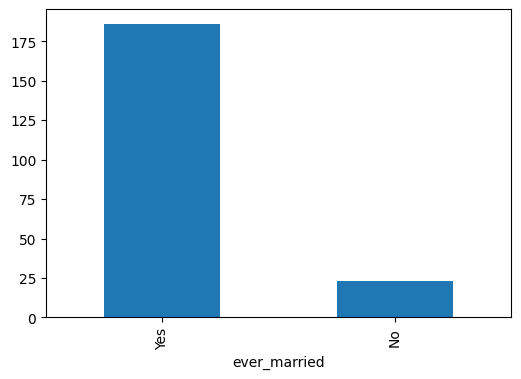

In [ ]:
plt.figure(figsize=(6,4))
stroke_patients["ever_married"].value_counts().plot(kind = "bar")

Individu yang sudah menikah lebih mendominasi daripada yang belum

**Hypertension**

In [ ]:
stroke_patients["hypertension"].value_counts()

hypertension
0    149
1     60
Name: count, dtype: int64

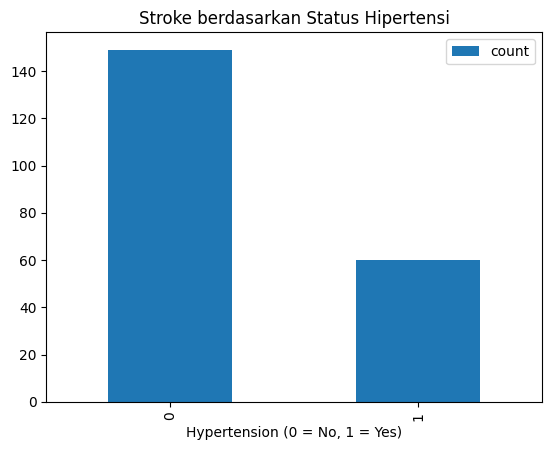

In [ ]:
stroke_patients["hypertension"].value_counts().plot(kind = "bar")
plt.title('Stroke berdasarkan Status Hipertensi')
plt.xlabel('Hypertension (0 = No, 1 = Yes)')
plt.legend(loc='upper right', bbox_to_anchor=(1, 1))

Dapat dilihat dari 209 pasien stroke 60 pasien merupakan penderita hipertensi.

**Heart Disease**

In [ ]:
stroke_patients["heart_disease"].value_counts()

heart_disease
0    169
1     40
Name: count, dtype: int64

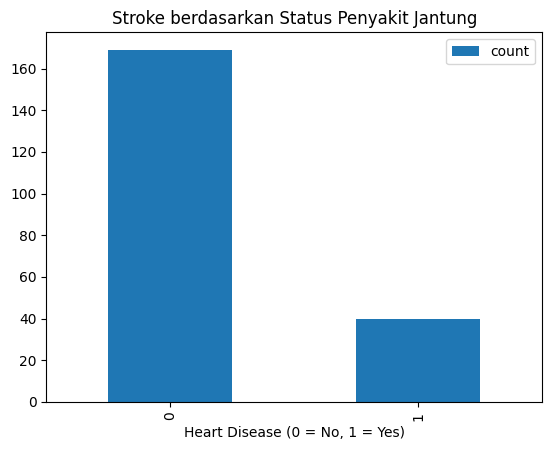

In [ ]:
stroke_patients["heart_disease"].value_counts().plot(kind = "bar")
plt.title('Stroke berdasarkan Status Penyakit Jantung')
plt.xlabel('Heart Disease (0 = No, 1 = Yes)')
plt.legend(loc='upper right', bbox_to_anchor=(1, 1))

Dari 209 pasien stroke, 40 orang merupakan penderita penyakit jantung dan 169 orang tidak

#### Numerical Features

**Age**

In [ ]:
stroke_patients["age"].value_counts()

age
80.0    16
78.0    16
81.0    14
79.0    13
57.0    10
82.0     9
68.0     9
63.0     7
77.0     7
74.0     7
70.0     6
59.0     6
54.0     6
69.0     6
71.0     5
76.0     5
72.0     5
60.0     4
61.0     4
73.0     4
58.0     4
66.0     3
45.0     3
56.0     3
51.0     3
67.0     3
39.0     3
75.0     3
49.0     3
50.0     3
52.0     2
65.0     2
64.0     2
48.0     2
53.0     2
55.0     2
43.0     1
47.0     1
38.0     1
46.0     1
32.0     1
42.0     1
14.0     1
Name: count, dtype: int64

Terlihat beberapa rentang usia, pasien yang berusia 78 atau 80 lebih rentan terkena stroke. KIta akan membagi rentang usia menjadi 4 kelompok dan memvisualisasikannya agar mudah dimengerti.

In [ ]:
age_range = [0, 24, 45, 60, 80, 100]

stroke_patients['age_group'] = pd.cut(stroke_patients['age'], bins=age_range, labels=['0 to 24', '25 to 44', '45 to 59', '69 to 79', '80 to 99'])

age_group = stroke_patients.groupby(['age_group']).size().reset_index(name = 'count')
age_group

<ipython-input-36-dec98c4665f1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stroke_patients['age_group'] = pd.cut(stroke_patients['age'], bins=age_range, labels=['0 to 24', '25 to 44', '45 to 59', '69 to 79', '80 to 99'])


,age_group,count
0,0 to 24,1
1,25 to 44,10
2,45 to 59,52
3,69 to 79,123
4,80 to 99,23


(array([0, 1, 2, 3, 4]),
 [Text(0, 0, '69 to 79'),
  Text(1, 0, '45 to 59'),
  Text(2, 0, '80 to 99'),
  Text(3, 0, '25 to 44'),
  Text(4, 0, '0 to 24')])

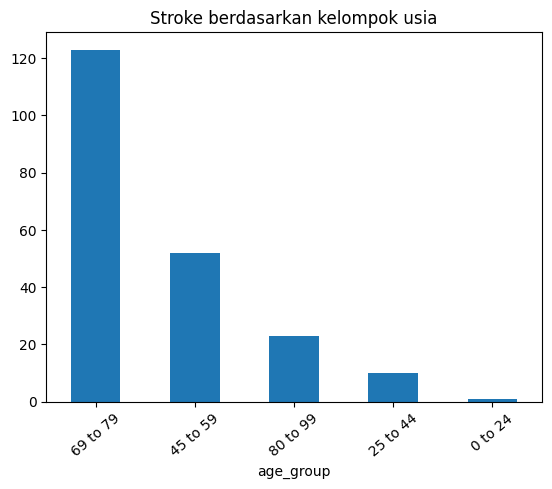

In [ ]:
stroke_patients["age_group"].value_counts().plot(kind = "bar")
plt.title('Stroke berdasarkan kelompok usia')
plt.xticks(rotation=40)

Dapat dilihat bahwa pasien yang berusia 69 sampai 79 tahun lebih rentan terkena stroke.

**Average Glucose Level**

In [ ]:
stroke_patients["avg_glucose_level"].value_counts()

avg_glucose_level
228.69    1
131.41    1
195.71    1
74.02     1
203.87    1
         ..
226.98    1
72.81     1
68.02     1
68.56     1
78.81     1
Name: count, Length: 209, dtype: int64

Menurut National Institutes of Health (NIH), berikut merupakan kisaran kadar gula darah.

- 99 mg/dL, kadar gula darah normal
- 100-125 mg/dL, berarti pradiabetes
- 126 mg/dL atau lebih tinggi, merupakan diabetes

In [ ]:
stroke_patients['avg_glucose_level'] = stroke_patients['avg_glucose_level'].astype(int)
gluco_range = [0, 99, 125, float('inf')]
stroke_patients['gluco_group'] = pd.cut(stroke_patients['avg_glucose_level'], bins=gluco_range, labels=['0 to 99', '100 to 125', '126 and over'])
gluco_group = stroke_patients.groupby(['gluco_group']).size().reset_index(name = 'count')
gluco_group

<ipython-input-39-4fef5e199b90>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stroke_patients['avg_glucose_level'] = stroke_patients['avg_glucose_level'].astype(int)
<ipython-input-39-4fef5e199b90>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stroke_patients['gluco_group'] = pd.cut(stroke_patients['avg_glucose_level'], bins=gluco_range, labels=['0 to 99', '100 to 125', '126 and over'])


,gluco_group,count
0,0 to 99,93
1,100 to 125,29
2,126 and over,87


(array([0, 1, 2]),
 [Text(0, 0, '0 to 99'), Text(1, 0, '126 and over'), Text(2, 0, '100 to 125')])

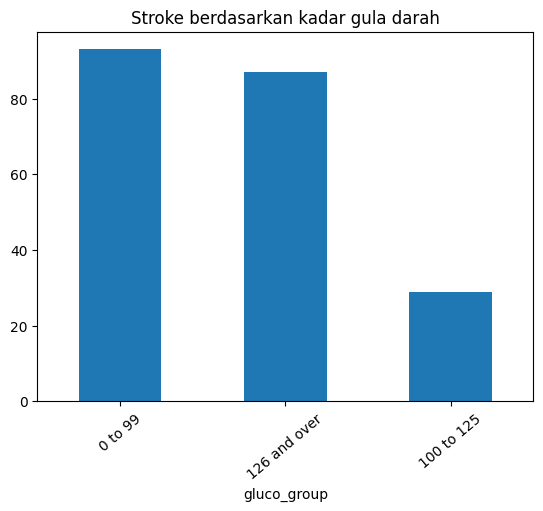

In [ ]:
stroke_patients["gluco_group"].value_counts().plot(kind = "bar")
plt.title('Stroke berdasarkan kadar gula darah')
plt.xticks(rotation=40)

Dapat dilihat bahwa 93 pasien memiliki kadar gula darah normal. 87 pasien memiliki diabetes.

**BMI**

- 0 - 18.4: Underweight
- 18.5 - 24.9: Normal
- 25.0 - 29.9: Overweight
- 30 or more: Obesitas

In [ ]:
bmi_range = [0, 18.5, 25.0, 30.0, float('inf')]
labels = ['0 to 18.4', '18.5 to 24.9', '25.0 to 29.9', '30.0 and more']
stroke_patients['bmi'] = pd.cut(stroke_patients['bmi'], bins=bmi_range, labels=labels)
bmi_group = stroke_patients.groupby('bmi').size().reset_index(name='count')
bmi_group

<ipython-input-41-18da8eaf5e63>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stroke_patients['bmi'] = pd.cut(stroke_patients['bmi'], bins=bmi_range, labels=labels)


,bmi,count
0,0 to 18.4,1
1,18.5 to 24.9,37
2,25.0 to 29.9,75
3,30.0 and more,96


(array([0, 1, 2, 3]),
 [Text(0, 0, '30.0 and more'),
  Text(1, 0, '25.0 to 29.9'),
  Text(2, 0, '18.5 to 24.9'),
  Text(3, 0, '0 to 18.4')])

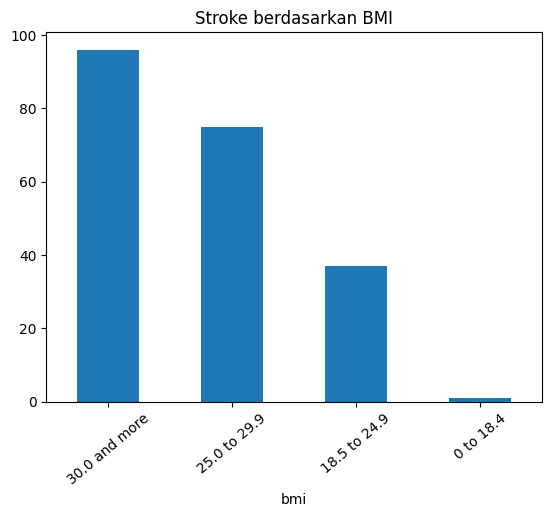

In [ ]:
stroke_patients["bmi"].value_counts().plot(kind = "bar")
plt.title('Stroke berdasarkan BMI')
plt.xticks(rotation=40)

Dapat dilihat bahwa 96 pasien stroke memiliki BMI 30 atau lebih yang diketegorikan sebagai obesitas.

# Data Preprocessing

#### Feature Engineering

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4909 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4909 non-null   object 
 1   age                4909 non-null   float64
 2   hypertension       4909 non-null   int64  
 3   heart_disease      4909 non-null   int64  
 4   ever_married       4909 non-null   object 
 5   work_type          4909 non-null   object 
 6   Residence_type     4909 non-null   object 
 7   avg_glucose_level  4909 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     4909 non-null   object 
 10  stroke             4909 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 460.2+ KB


Pemberian label pada kolom gender, ever_married, dan Residence_type

In [ ]:
df['gender'].replace(['Male', 'Female', 'Other'],[0, 1, 1], inplace=True)

In [ ]:
df['ever_married'].replace(['Yes', 'No'],[0, 1], inplace=True)

In [ ]:
df['Residence_type'].replace(['Rural', 'Urban'],[0, 1], inplace=True)

In [ ]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,67.0,0,1,0,Private,1,228.69,36.6,formerly smoked,1
2,0,80.0,0,1,0,Private,0,105.92,32.5,never smoked,1
3,1,49.0,0,0,0,Private,1,171.23,34.4,smokes,1
4,1,79.0,1,0,0,Self-employed,0,174.12,24.0,never smoked,1
5,0,81.0,0,0,0,Private,1,186.21,29.0,formerly smoked,1


**OneHotEncoding**

In [ ]:
one_hot_encoded = df[['smoking_status','work_type']]
one_hot_encoded=pd.get_dummies(one_hot_encoded)
df.drop(columns=['smoking_status','work_type'],inplace=True)

In [ ]:
df_encoded = pd.concat([df, one_hot_encoded], axis=1)

In [ ]:
df_encoded.head()

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children
0,0,67.0,0,1,0,1,228.69,36.6,1,False,True,False,False,False,False,True,False,False
2,0,80.0,0,1,0,0,105.92,32.5,1,False,False,True,False,False,False,True,False,False
3,1,49.0,0,0,0,1,171.23,34.4,1,False,False,False,True,False,False,True,False,False
4,1,79.0,1,0,0,0,174.12,24.0,1,False,False,True,False,False,False,False,True,False
5,0,81.0,0,0,0,1,186.21,29.0,1,False,True,False,False,False,False,True,False,False


#### Data Split

In [ ]:
# feature & target
X = df_encoded.drop("stroke", axis=1)
y = df_encoded["stroke"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

### Oversampling

In [ ]:
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

#### Scaler

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_smote)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Modeling

#### Decision Tree

In [ ]:
# Training Model
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

In [ ]:
# Evaluasi Model
predictions = dt.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

Accuracy: 0.9161237785016286


In [ ]:
y_pred_train = dt.predict(X_train)
accuracy_train = accuracy_score(y_train, y_pred_train)
print("Accuracy:", accuracy_train)

Accuracy: 1.0


In [ ]:
# Classification Report
print("Classification Repor data test:")
print(classification_report(y_test, predictions))

Classification Repor data test:
              precision    recall  f1-score   support

           0       0.95      0.96      0.96      1165
           1       0.14      0.13      0.13        63

    accuracy                           0.92      1228
   macro avg       0.55      0.54      0.55      1228
weighted avg       0.91      0.92      0.91      1228



#### Random Forest

In [ ]:
# Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
# Evaluasi Model
predictions = rf.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

Accuracy: 0.9486970684039088


In [ ]:
y_pred_train = rf.predict(X_train)
accuracy_train = accuracy_score(y_train, y_pred_train)
print("Accuracy:", accuracy_train)

Accuracy: 1.0


In [ ]:
# Classification Report
print("Classification Repor data test:")
print(classification_report(y_test, predictions))

Classification Repor data test:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1165
           1       0.50      0.03      0.06        63

    accuracy                           0.95      1228
   macro avg       0.73      0.52      0.52      1228
weighted avg       0.93      0.95      0.93      1228



#### Hyperparameter Tunning

In [ ]:
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform GridSearchCV with verbose output
grid_search = GridSearchCV(dt, param_grid, cv=5, verbose=1)
grid_search = GridSearchCV(rf, param_grid, cv=5, verbose=1)
grid_search.fit(X_val_scaled, y_val)

# Print best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best Parameters: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best Score: 0.9619976498237369


#### Model Comparison

In [ ]:
classifiers = [
    ("Random Forest", RandomForestClassifier(n_estimators=50,max_depth=None,min_samples_split=5,min_samples_leaf=1,max_features='auto',random_state=42)),
    ("Decision Tree", DecisionTreeClassifier(criterion='entropy',max_depth=10,min_samples_split=10,min_samples_leaf=2,random_state=42)),
]

In [ ]:
results = []
for name, clf in classifiers:
    clf.fit(X_train_scaled, y_train_smote)
    y_pred = clf.predict(X_test_scaled)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    results.append([name, accuracy, precision, recall, f1])

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Text(0.5, 1.0, 'Perbandingan Model Dataset Test')

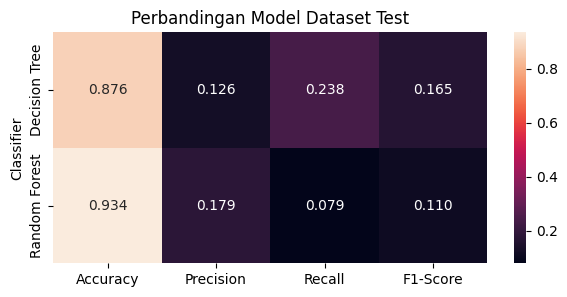

In [ ]:
results_df = pd.DataFrame(results, columns=["Classifier", "Accuracy", "Precision", "Recall", "F1-Score"])

results_df = results_df.sort_values(by="F1-Score", ascending=False)

# heatmap
plt.figure(figsize=(7, 3))
sns.heatmap(results_df.set_index("Classifier"), annot=True, fmt=".3f",  xticklabels=["Accuracy", "Precision", "Recall", "F1-Score"])
plt.title("Perbandingan Model Dataset Test")


Jika dilihat dari akurasinya, random forest adalah model yang lebih baik.